In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [4]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

In [10]:
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist=dmlp.fit(x_train, y_train,batch_size=128, epochs=50,validation_data=(x_test, y_test), verbose=2)
print('정확률=', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
469/469 - 2s - loss: 0.3981 - accuracy: 0.9011 - val_loss: 0.1747 - val_accuracy: 0.9499 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.1435 - accuracy: 0.9583 - val_loss: 0.1152 - val_accuracy: 0.9647 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0979 - accuracy: 0.9711 - val_loss: 0.0957 - val_accuracy: 0.9706 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0818 - val_accuracy: 0.9759 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.0776 - val_accuracy: 0.9765 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0416 - accuracy: 0.9880 - val_loss: 0.0664 - val_accuracy: 0.9796 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.0628 - val_accuracy: 0.9803 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.0633 - val_accuracy: 0.9801 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s 

In [11]:
dmlp.save('dmlp_trained.h5')

In [12]:
import matplotlib.pyplot as plt

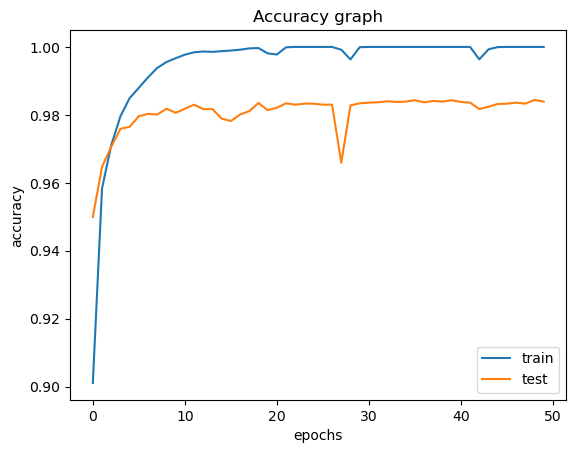

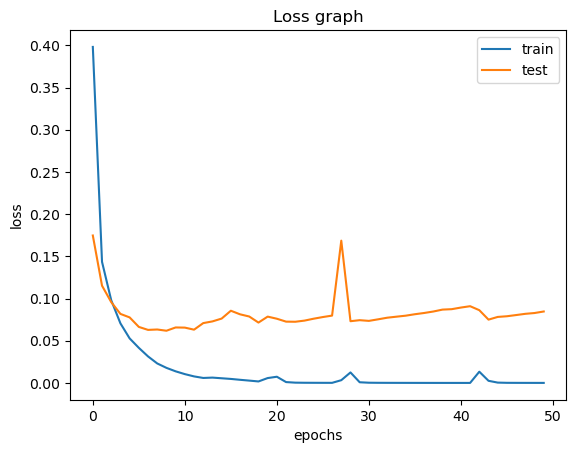

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid
plt.show()